# Full Experiment Aquisition

In [1]:
import ximea_cam_aquire_save as aquire
import run_experiment as runexp
import run_analysis as runana

import imp
import numpy as np
import matplotlib.pyplot as plt
import imageio

import cv2
import schedule
import time

In [2]:
#settings
subject = 'test_subject'
task = 'test_task'
exp = 'exp'
capture_dir = './capture'
analysis_dir = './analysis'
frames = 500

In [3]:
imp.reload(runexp)
imp.reload(aquire)
runexp.run_experiment(subject_name=subject, 
                      task_name=task, 
                      exp_type=exp,
                      save_dir=capture_dir,
                      max_frames=frames)

Running an experiment.
Started eyetracking aquisition at 200fps...
Started imu aquisition at 200fps...
Starting scene aquisition at 200fps...
Setting cam exposure to 5.0 ms
Saving Queue Started...
Saving Queue Started...
Saving Queue Started...
Finished PupilLabs Aquisition.
Finished Realsense Aquisition.
********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************Sampled to max num frames of 500
Cleanly Stopping Device Aquisition and closing file.
Writing Queue of Timestamps...
Waiting for save threads/queues to finish...
Finished Ximea Aquisition.


()

Process Process-5:
Process Process-4:
Process Process-3:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/vasha/code/backpack_computer_aquisition/run_experiment.py", line 34, in run_queue_worker
    frame_data = q.get()
  File "/home/vasha/code/backpack_computer_aquisition/run_experiment.py

########################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

Running Frame Analysis...
Mean camera time disparity: 0.0096 seconds
Mean OS dts: 0.0090 seconds
Mean OD dts: 0.0091 seconds
Mean CY dts: 0.0091 seconds


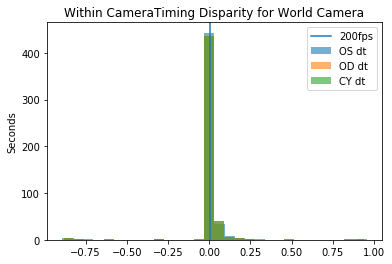

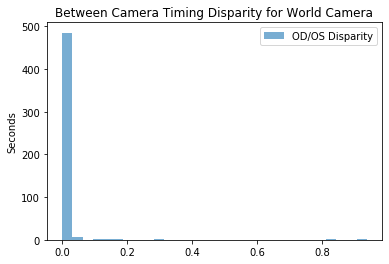

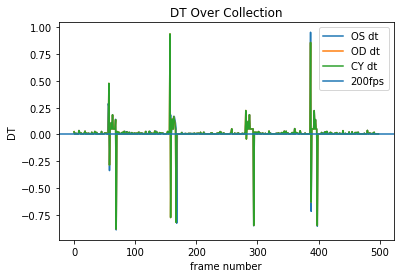

Waiting for frame conversions...


Process Process-12:
Process Process-13:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/vasha/code/backpack_computer_aquisition/run_analysis.py", line 67, in convert_folder
    convert_bin_png(os.path.join(read_folder,f), write_folder)
  File "/home/vasha/code/backpack_computer_aquisition/run_analysis.py", line 67, in convert_folder
    convert_bin_png(os.path.join(read_folder,f), write_folder)
  File "/home/vasha/code/backpack_computer_aquisition/run_analysis.py", line 46, in convert_bin_png
    binary_img.append(bs)
  File "/home/

************************************************

KeyboardInterrupt: 

Process Process-14:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/vasha/code/backpack_computer_aquisition/run_analysis.py", line 67, in convert_folder
    convert_bin_png(os.path.join(read_folder,f), write_folder)
KeyboardInterrupt


************************

In [10]:
imp.reload(runana)
runana.run_analysis(subject_name=subject, 
                      task_name=task, 
                      exp_type=exp,
                      read_dir=capture_dir,
                      save_dir=analysis_dir,
                      run_timestamp_stats=True,
                      run_convert_ims=True
                      )

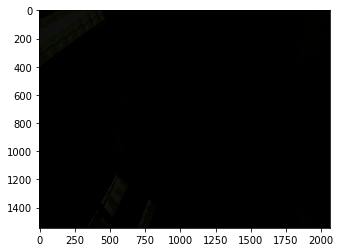

(array([9104617.,   30390.,   78298.,   30994.,   52730.,   26439.,
          45534.,   19547.,   29881.,  142018.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

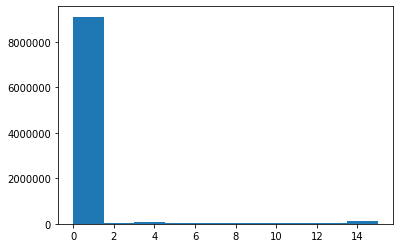

In [11]:
im = cv2.imread('./analysis/test_subject/test_task/exp/scene_camera/cam_od/frame_0.png')
plt.imshow(im)
plt.show()
plt.hist(im.flatten())

In [17]:

f= 'capture/test_subject/test_task/exp/scene_camera/cam_od/frame_0.bin'
a = []
# # for uint16
# with open(f, 'rb') as fn:
#     bss = fn.read(2)
#     while(bss):
#         bss = fn.read(1)
#         bbs = fn.read(1)
#         bs = int.from_bytes(bss,'big')
#         bb = int.from_bytes(bbs,'big')
#         s = 256*bb+bs
#         a.append(s)

# for uint8
with open(f, 'rb') as fn:
    bs = fn.read(1)
    while(bs):
        bs = fn.read(1)
        bs = int.from_bytes(bs,'big')
        a.append(bs)

a = np.array(a)

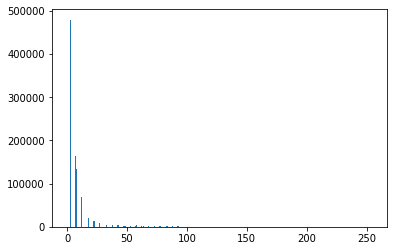

In [18]:
plt.hist(np.array(a).flatten(), bins=1000);

In [19]:
im = a.reshape((1544,2064))
imc = cv2.cvtColor(np.uint16(im), cv2.COLOR_BayerGR2RGB)

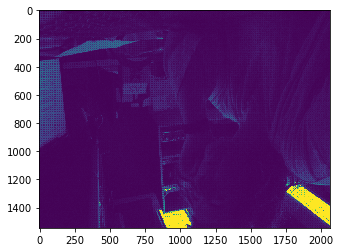

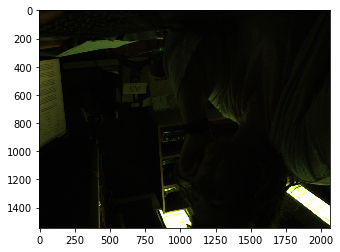

In [20]:
plt.imshow(im)
plt.show()
plt.imshow(imc)
plt.show()

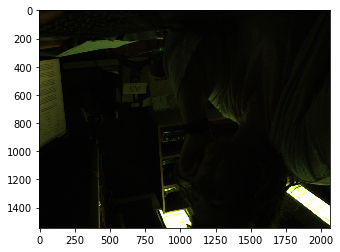

AttributeError: module 'cv2.cv2' has no attribute 'balanceWhite'

In [27]:
cv2.imwrite('test.png',imc.astype('float64'))
imcr = cv2.imread('test.png')
plt.imshow(imcr)
plt.show()
imcrw = cv2.balanceWhite(imcr)
plt.imshow(imcrw)
plt.show()


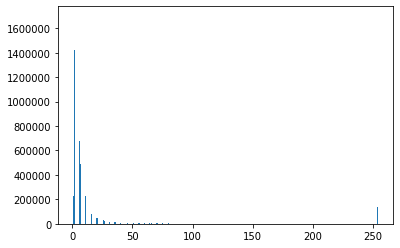

In [22]:
plt.hist(np.array(imc).flatten(), bins=1000);

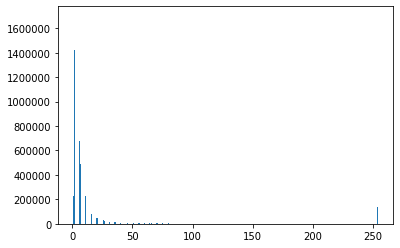

In [23]:
plt.hist(np.array(imc.astype('float64')).flatten(), bins=1000);

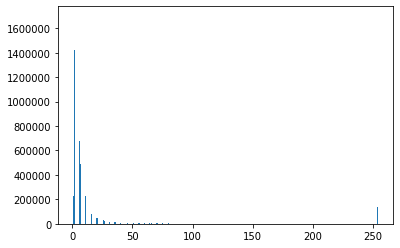

In [24]:
plt.hist(np.array(imcr).flatten(), bins=1000);

In [25]:
max(np.array(imc).flatten())

254

In [26]:
max(np.array(imcr).flatten())

254